<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Text-of-exercise-15-chapter-3-ISLRv2-book" data-toc-modified-id="Text-of-exercise-15-chapter-3-ISLRv2-book-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Text of exercise 15 chapter 3 ISLRv2 book</a></span></li><li><span><a href="#Reading-and-preprocessing-data-from-datacet" data-toc-modified-id="Reading-and-preprocessing-data-from-datacet-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading and preprocessing data from datacet</a></span><ul class="toc-item"><li><span><a href="#Conclusions-preliminary:" data-toc-modified-id="Conclusions-preliminary:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusions preliminary:</a></span></li><li><span><a href="#Conclusions-final:" data-toc-modified-id="Conclusions-final:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Conclusions final:</a></span></li></ul></li><li><span><a href="#items-a:-SLR-for-crim-onto-each-of-the-predictors" data-toc-modified-id="items-a:-SLR-for-crim-onto-each-of-the-predictors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>items a: SLR for <code>crim</code> onto each of the predictors</a></span><ul class="toc-item"><li><span><a href="#Conclusions:" data-toc-modified-id="Conclusions:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusions:</a></span></li></ul></li><li><span><a href="#item-b:-MLR-for-crim-onto-all-predictors" data-toc-modified-id="item-b:-MLR-for-crim-onto-all-predictors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>item b: MLR for <code>crim</code> onto all predictors</a></span><ul class="toc-item"><li><span><a href="#Conclusions:" data-toc-modified-id="Conclusions:-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusions:</a></span></li></ul></li><li><span><a href="#item-c:-comparing-same-predictors'-regression-coefficients-for-MLR-and-SLR-modelling" data-toc-modified-id="item-c:-comparing-same-predictors'-regression-coefficients-for-MLR-and-SLR-modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>item c: comparing same predictors' regression coefficients for MLR and SLR modelling</a></span><ul class="toc-item"><li><span><a href="#Conclusions:" data-toc-modified-id="Conclusions:-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Conclusions:</a></span></li></ul></li><li><span><a href="#item-d:-nonlinear-regression-for-each-of-the-predictors" data-toc-modified-id="item-d:-nonlinear-regression-for-each-of-the-predictors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>item d: nonlinear regression for each of the predictors</a></span><ul class="toc-item"><li><span><a href="#Conclusons:" data-toc-modified-id="Conclusons:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Conclusons:</a></span></li></ul></li><li><span><a href="#additional-task:-let's-implement-the-advice-in-6.1.2" data-toc-modified-id="additional-task:-let's-implement-the-advice-in-6.1.2-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>additional task: let's implement the advice in 6.1.2</a></span><ul class="toc-item"><li><span><a href="#Conclusions-(final):" data-toc-modified-id="Conclusions-(final):-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Conclusions (final):</a></span></li></ul></li><li><span><a href="#<<<-END-OF-DOCUMENT->>>" data-toc-modified-id="<<<-END-OF-DOCUMENT->>>-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>&lt;&lt;&lt; END OF DOCUMENT &gt;&gt;&gt;</a></span></li></ul></div>

# Text of exercise 15 chapter 3 ISLRv2 book

This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $ H_0\, :\,\, \beta_j = 0 $ ?

(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor `X`, fit a model of the form
$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon $$

\*) **ISLRv2** stands for: **An Introduction to Statistical Learning book by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani**

In [1]:
import datetime as dt
start_run = dt.datetime.now()

import math
import pandas as pd
import numpy as np
import scipy.stats as statmath 
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pyplot as plt

# Reading and preprocessing data from datacet

In [2]:
df = pd.read_csv('datasets/Boston.csv', index_col=0)
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6


In [3]:
round(df.describe(),5).drop(index=['count','25%','75%']).rename(index={'50%':'median'})

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
mean,3.61352,11.36364,11.13678,0.06917,0.55470,6.28463,68.57490,3.79504,9.54941,408.23715,18.45553,12.65306,22.53281
std,8.60155,23.32245,6.86035,0.25399,0.11588,0.70262,28.14886,2.10571,8.70726,168.53712,2.16495,7.14106,9.19710
min,0.00632,0.00000,0.46000,0.00000,0.38500,3.56100,2.90000,1.12960,1.00000,187.00000,12.60000,1.73000,5.00000
median,0.25651,0.00000,9.69000,0.00000,0.53800,6.20850,77.50000,3.20745,5.00000,330.00000,19.05000,11.36000,21.20000
max,88.97620,100.00000,27.74000,1.00000,0.87100,8.78000,100.00000,12.12650,24.00000,711.00000,22.00000,37.97000,50.00000


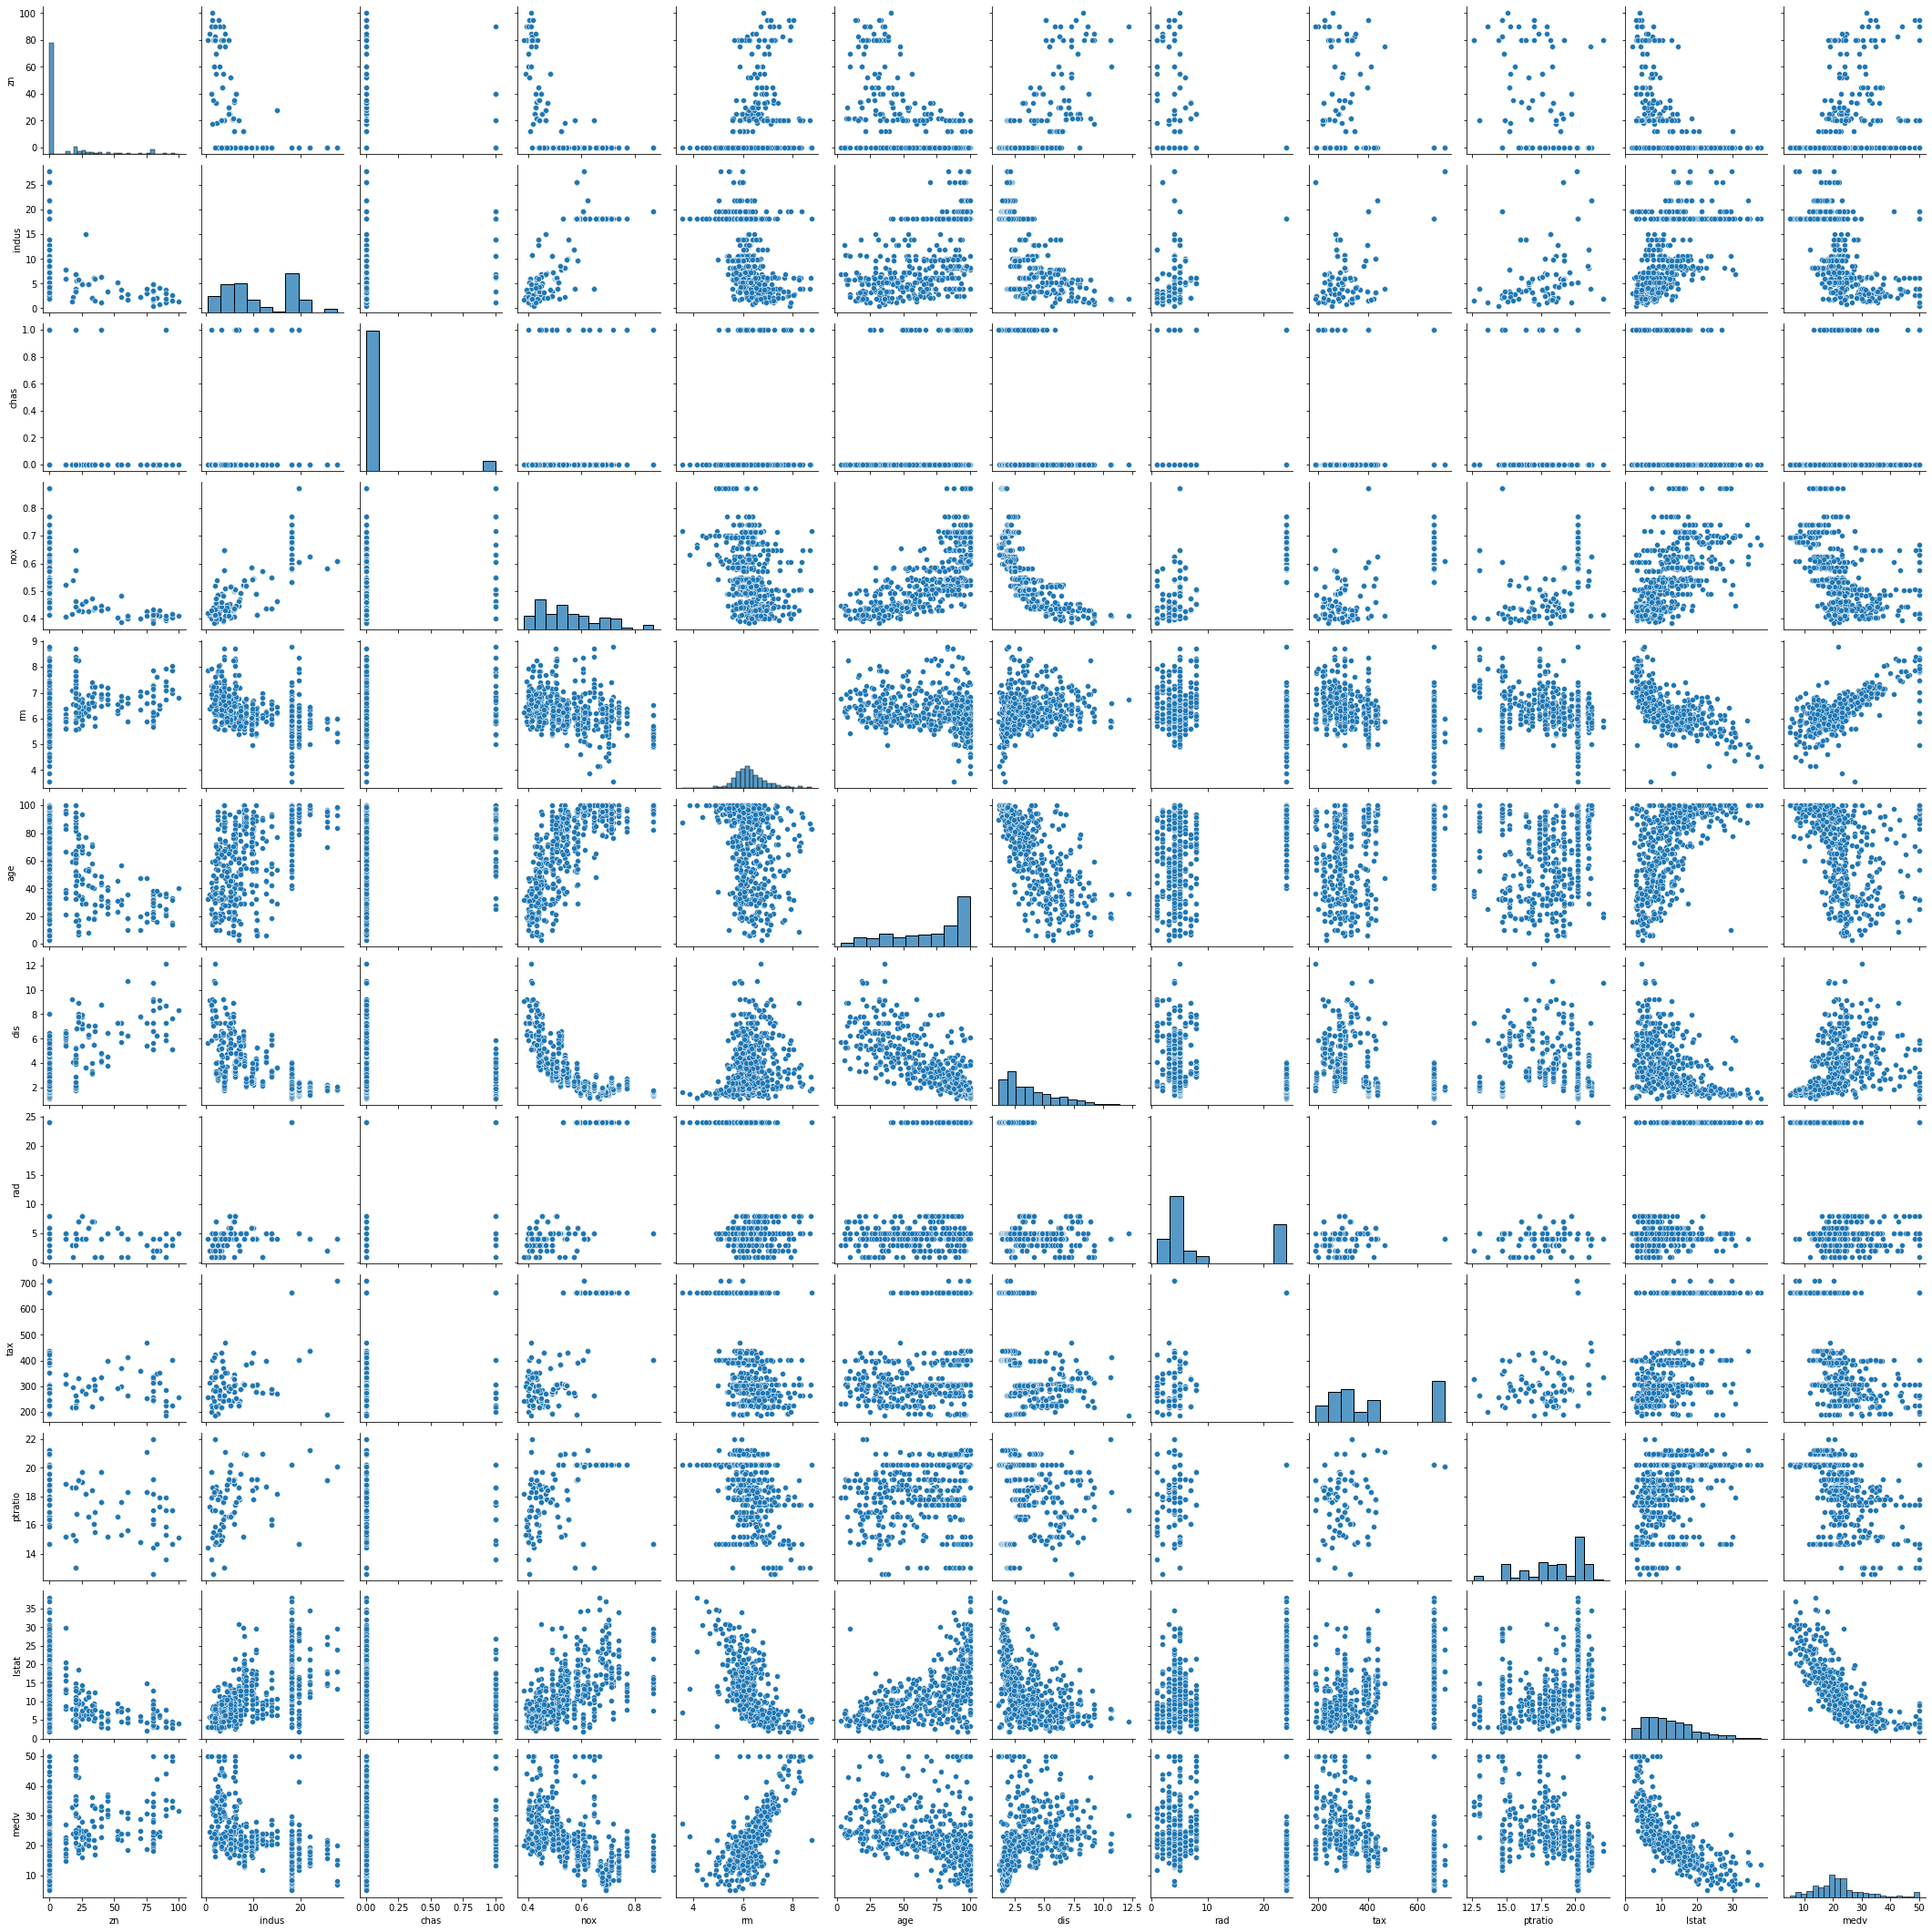

In [4]:
sns.pairplot(df.drop(columns='crim'))
plt.show()

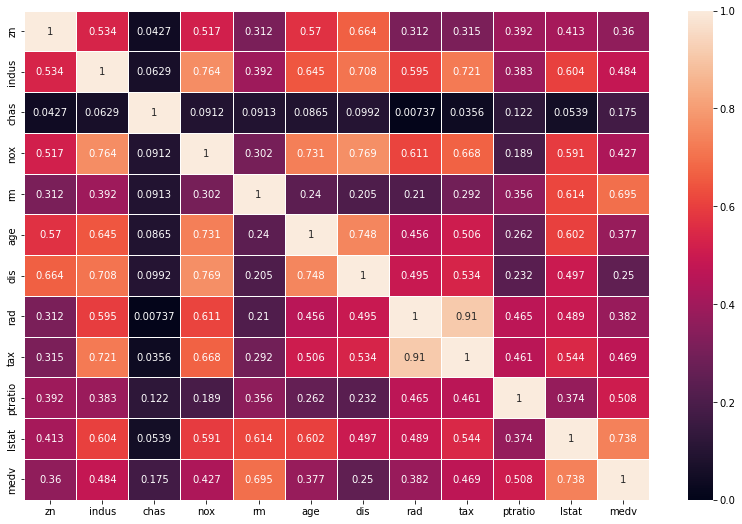

In [5]:
plt.figure(figsize=(14,9))
sns.heatmap(abs(df.drop(columns='crim').corr()), vmin=0, vmax=1, annot=True, fmt='.3g', linewidths=1)
plt.show()

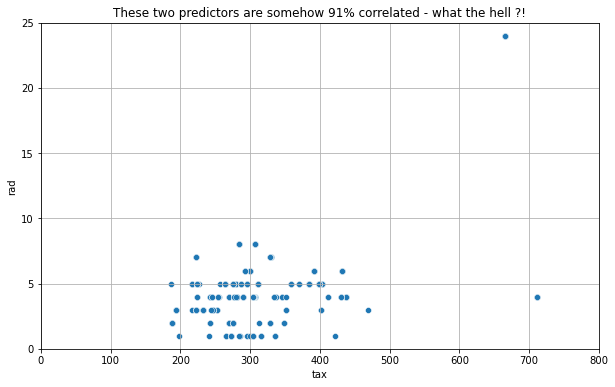

In [6]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=df, x='tax', y='rad')
plt.title('These two predictors are somehow 91% correlated - what the hell ?!')
ax.set_xlim(0,800)
ax.set_ylim(0,25)
plt.grid()
plt.show()

## Conclusions preliminary:
1. Despite `tax` ans `rad` are highly correlated, they do not look collinear on the graph.  The correlation might be caused by domination of one particular combination of (tax, rad) values. 
2. For other correlated pairs their dependence can be seen on pairplot too.

Let's investigate in more details the paradox of (tax, rad) correlation:

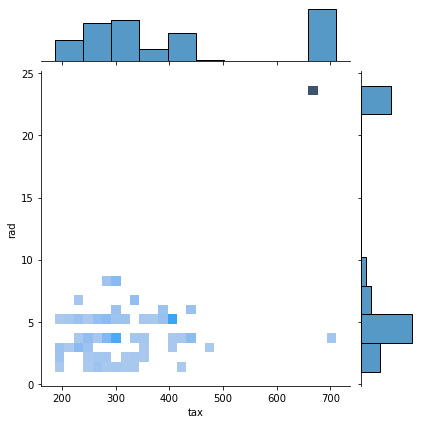

In [7]:
sns.jointplot(data=df, x="tax", y="rad", kind="hist", bins=30)

plt.show()

In [8]:
print()
print( round( len(df.query('rad > 22')) / len(df) * 100 , 1), '% out of', len(df), 
      'data entries have same outliner value of (tax, rad) =',
      df.query('rad > 22')[['tax','rad']].value_counts().index[0] )

print( 'one half of', round( len(df.query('tax < 500')) / len(df) * 100 , 1), '% out of', len(df), 
      'data entries have grouped values of (tax, rad) in:')

df.query('tax < 500')[['tax','rad']].describe().loc[['25%','50%','75%']].rename(
    index={'25%':'from','50%':'center','75%':'till'})


26.1 % out of 506 data entries have same outliner value of (tax, rad) = (666, 24)
one half of 72.9 % out of 506 data entries have grouped values of (tax, rad) in:


,tax,rad
from,270.0,4.0
center,304.0,4.0
till,384.0,5.0


## Conclusions final:
3. Thus the high correlation for (tax,rad) is explained by the fact that the `tax` vs `rad` relation is like high leverage mass-dipole with 3/4- of mass centered around the point (304 , 4) and 1/4+ of mass focuced in one only value of (666 , 24) - in *far distance* from the first center.
4. It is exactly the big momentum of such mass-dipole that creates 91% correlation effect, despite we do not see a line-like graph of this relation - *de-facto* we have only two main points of this line with some stochastic spread of one of them.
5. predictor `chas` is actually binary 0/1.
6. Unfortunately we do not have description of fields semantics, so we cannot give sensible interpretation of the noticed features of the data.

# items a: SLR for `crim` onto each of the predictors

In [9]:
rng = np.random.default_rng()  # creating numpy random generator object

SLR_obj = linear_model.LinearRegression()       # creating sklearn SLR model object

def SLR_stat(df, result='crim', predictor='age'):
    
    n_bstr = len(df) // 2
    index_list = list(df.index)
    sampling_df = pd.DataFrame(columns=['beta_0', 'beta_1'])
    
    for i in range(len(df)):
        
        index_sample = rng.choice(index_list, size=n_bstr, replace=False)
        df_sample = df.loc[index_sample]
        X = np.array(df_sample[predictor])
        Y = np.array(df_sample[result])
        
        SLR_obj.fit(X.reshape(-1, 1),Y)
        sampling_df.loc[i] = [ SLR_obj.intercept_, SLR_obj.coef_[0] ]
    
    beta_0 = sampling_df['beta_0'].mean()
    beta_1 = sampling_df['beta_1'].mean()
    std_0 = sampling_df['beta_0'].std() / math.sqrt(2)
    std_1 = sampling_df['beta_1'].std() / math.sqrt(2)
    t_stat_0 = beta_0 / std_0
    t_stat_1 = beta_1 / std_1
    pvalue_0 = statmath.t.sf(abs(t_stat_0), len(df))*2
    pvalue_1 = statmath.t.sf(abs(t_stat_1), len(df))*2
    R2_stat = r2_score(
        df[result],
        df[predictor]*beta_1 + beta_0
    )
    
    return [R2_stat, beta_0, beta_1, std_0, std_1, t_stat_0, t_stat_1, pvalue_0, pvalue_1]

params_data = []
columns_list = df.drop(columns='crim').columns

for col in columns_list:
    params_data.append( SLR_stat(df, predictor=col) )

SLR_params_tbl = pd.DataFrame(
    params_data,
    columns = ['R2_stat','beta_0', 'beta_1', 'std_0', 'std_1', 't_stat_0', 't_stat_1', 'pvalue_0', 'pvalue_1'],
    index = columns_list
)

SLR_params_tbl.sort_values('R2_stat', ascending=False)[['R2_stat', 'beta_1', 'std_1','t_stat_1', 'pvalue_1']]

,R2_stat,beta_1,std_1,t_stat_1,pvalue_1
rad,0.391248,0.615597,0.040866,15.063792,1.240077e-42
tax,0.339611,0.029825,0.002018,14.781395,2.343853e-41
lstat,0.207580,0.545379,0.045729,11.926430,4.539225e-29
nox,0.177195,31.571892,2.670633,11.821877,1.206668e-28
indus,0.165278,0.515116,0.043314,11.892580,6.232698e-29
medv,0.150754,-0.367909,0.040991,-8.975333,5.536179e-18
dis,0.144143,-1.559997,0.137433,-11.350961,9.288059e-27
age,0.124420,0.107984,0.008696,12.418232,4.293078e-31
ptratio,0.084068,1.154316,0.107144,10.773454,1.658770e-24
rm,0.048066,-2.691913,0.382504,-7.037611,6.393275e-12



                 SIMPLE LINEAR REGRESSION FOR crim ONTO EACH OF THE PREDICTORS (red is the regression line):


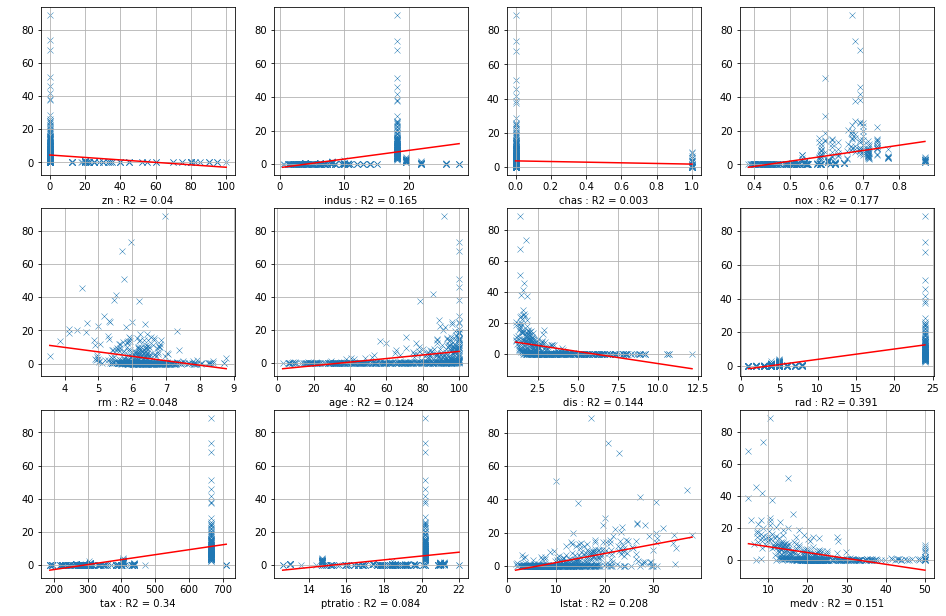

In [10]:
plt.figure(figsize=(4*4,3*3.5))
ax = [ plt.subplot(3,4,i) for i in range(1,4*3+1) ]

for i in range(1,4*3+1):
    sns.scatterplot(data=df, x=df.columns[i], y='crim', ax=ax[i-1],marker='x')
    x_pair = [df[df.columns[i]].min(), df[df.columns[i]].max()]
    ax[i-1].plot(x_pair,
        [SLR_params_tbl.loc[df.columns[i],'beta_0'] + SLR_params_tbl.loc[df.columns[i],'beta_1'] * x for x in x_pair],
        color='red')
    ax[i-1].set_xlabel(df.columns[i]+' : R2 = '+str(round(SLR_params_tbl.loc[df.columns[i],'R2_stat'],3)))
    ax[i-1].set_ylabel(' ')
    ax[i-1].grid()

print('\n',' '*15, 'SIMPLE LINEAR REGRESSION FOR crim ONTO EACH OF THE PREDICTORS (red is the regression line):')
plt.show()

## Conclusions:
1. Despite all *pvalues* for `beta_1` are quite small, the SLR model gives very bad approximation of `crim` for any of the predictors - the R2 values are too far from 1!
2. The best approximations are for `rad` and `tax`:
 * R2 = 0.39 for **rad**,
 * R2 = 0.34 for **tax**.
3. But as we have seen before, the `rad` and `tax` correlation is 91%, so this is actually one leader.
4. For other predictors the R2 < 0.21, so the SLR does not work for them at all.  This can be seen also on the plots above.

# item b: MLR for `crim` onto all predictors

In [11]:
MLR_obj = linear_model.LinearRegression()       # creating sklearn MLR model object

def MLR_stat(df, result='crim'):
    
    predictors = list(df.drop(columns=result).columns)
    n_bstr = len(df) // 2
    index_list = list(df.index)
    sampling_df = pd.DataFrame(columns=['R2_stat','intercept']+predictors)
    
    for i in range(len(df)):
        
        index_sample = rng.choice(index_list, size=n_bstr, replace=False)
        df_sample = df.loc[index_sample]
        X = np.array(df_sample[predictors])
        Y = np.array(df_sample[result])
        
        SLR_obj.fit(X,Y)
        sampling_df.loc[i] = [SLR_obj.score(X,Y), SLR_obj.intercept_]+list(SLR_obj.coef_)
    
    values = sampling_df.mean()
    stds = sampling_df.std() / math.sqrt(2)
    
    show_df = pd.DataFrame(
        [values,stds],
        index=['beta_j','std']
    )
    
    show_df.loc['t_st'] = show_df.loc['beta_j'] / show_df.loc['std']
    
    show_df.loc['pval'] = show_df.loc['t_st'].apply(lambda t_stat: statmath.t.sf(abs(t_stat), len(df))*2 )
    
    return show_df

MLR_params_tbl = MLR_stat(df)

round( MLR_params_tbl, 5)

,R2_stat,intercept,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
beta_j,0.47316,13.47765,0.04568,-0.06152,-0.81298,-9.66527,0.67560,-0.00207,-1.01501,0.60899,-0.00384,-0.30329,0.14482,-0.22320
std,0.04735,4.60519,0.00758,0.02809,0.40961,3.06882,0.69088,0.00907,0.18112,0.05159,0.00153,0.07080,0.06445,0.07413
t_st,9.99387,2.92662,6.02697,-2.18975,-1.98476,-3.14950,0.97788,-0.22806,-5.60410,11.80454,-2.51509,-4.28348,2.24691,-3.01081
pval,0.00000,0.00358,0.00000,0.02900,0.04771,0.00173,0.32860,0.81969,0.00000,0.00000,0.01221,0.00002,0.02508,0.00274


## Conclusions:
1. We can reject $ H_0\, :\,\, \beta_j=0 $ for all predictors except `age` and `rm`.
2. In addition for three predictors more the t-statistics is on the very border of 95% confidence interval - these are: `chas`, `lstat` and `indus`.
3. For other predictors the $\beta_j$ are far from 0, including the intercept.
4. This pvalue analysis sais that `crim` depends rather on `rad`, while `tax` is here only due to its high correlation between them. 

# item c: comparing same predictors' regression coefficients for MLR and SLR modelling
As soon as our predictors were not studentized, the plotting different $\beta_j$ on the same plot would not look good - because of different scale, so we better plot t-statistics instead

In [12]:
compare_tbl = pd.DataFrame(
    [ MLR_params_tbl.drop(columns=['R2_stat','intercept']).loc['pval'],
      MLR_params_tbl.drop(columns=['R2_stat','intercept']).loc['t_st'],
      SLR_params_tbl['t_stat_1'], 
      MLR_params_tbl.drop(columns=['R2_stat','intercept']).loc['beta_j'],
      SLR_params_tbl['beta_1']
    ],
    index = ['pval_MLR','MLR_t_st','SLR_t_st', 'MLR_beta_j','SLR_beta_1']
).T.sort_values('pval_MLR')

compare_tbl['rel_delta_in_betas_(%)'] = round(abs( (compare_tbl['SLR_beta_1'] - compare_tbl['MLR_beta_j']) / 
                                       compare_tbl['MLR_beta_j'] ) * 100, 1)

compare_tbl

,pval_MLR,MLR_t_st,SLR_t_st,MLR_beta_j,SLR_beta_1,rel_delta_in_betas_(%)
rad,1.418361e-28,11.804542,15.063792,0.608988,0.615597,1.1
zn,3.221138e-09,6.026973,-12.490342,0.045684,-0.073955,261.9
dis,3.443770e-08,-5.604097,-11.350961,-1.015012,-1.559997,53.7
ptratio,2.202576e-05,-4.283476,10.773454,-0.303286,1.154316,480.6
nox,1.732157e-03,-3.149503,11.821877,-9.665270,31.571892,426.7
medv,2.735682e-03,-3.010809,-8.975333,-0.223200,-0.367909,64.8
tax,1.220912e-02,-2.515087,14.781395,-0.003839,0.029825,877.0
lstat,2.507602e-02,2.246910,11.926430,0.144818,0.545379,276.6
indus,2.899828e-02,-2.189749,11.892580,-0.061518,0.515116,937.3
chas,4.771023e-02,-1.984765,-4.667660,-0.812983,-1.884299,131.8


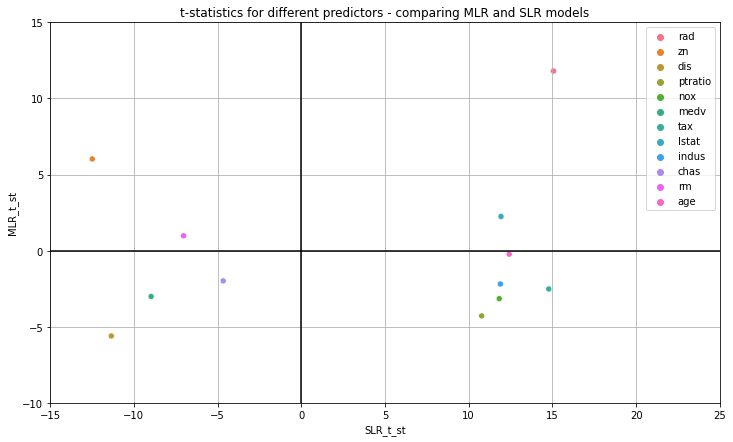

In [13]:
plt.figure(figsize=(12,7))
ax = sns.scatterplot(data=compare_tbl, x='SLR_t_st', y='MLR_t_st', hue=list(compare_tbl.index) )

ax.set_xlim(-15,25)
ax.set_ylim(-10,15)
ax.axvline(x=0, color='black')
ax.axhline(y=0, color='black')

plt.title('t-statistics for different predictors - comparing MLR and SLR models')
plt.grid()
plt.show()

## Conclusions:
1. The SLR $\beta_1$ has nothing in common with MLR $\beta_j$ - except for most important predictor `rad`, for which the slopes are the same for MLR and SLR (with only 0.5% difference).  
2. The same order of magnitude for SLR $\beta_1$ and $\beta_j$ are only for `dis` and `medv`.
3. For half of predictors even the sign of the slopes are different for MLR vs SLR, thus no reasonable interpretation might come from SLR at all.
4. The R2 for multiple regression is only slightly better than R2 for SLR onto `rad` 

# item d: nonlinear regression for each of the predictors

In [14]:
NoneLR_obj = linear_model.LinearRegression()       # creating sklearn NoneLR model object

def NoneLR_stat(df, result='crim', predictor='age'):
    
    n_bstr = len(df) // 2
    index_list = list(df.index)
    sampling_df = pd.DataFrame(columns=['beta_0', 'beta_1','beta_2','beta_3'])
    
    df[predictor+'**2'] = df[predictor]**2
    df[predictor+'**3'] = df[predictor]**3
    
    for i in range(len(df)):
        
        index_sample = rng.choice(index_list, size=n_bstr, replace=False)
        df_sample = df.loc[index_sample]
        X = np.array(df_sample[[predictor,predictor+'**2',predictor+'**3']])
        Y = np.array(df_sample[result])
        
        NoneLR_obj.fit(X,Y)
        sampling_df.loc[i] = [ NoneLR_obj.intercept_, NoneLR_obj.coef_[0], NoneLR_obj.coef_[1], NoneLR_obj.coef_[2]]
    
    beta_0 = sampling_df['beta_0'].mean()
    beta_1 = sampling_df['beta_1'].mean()
    beta_2 = sampling_df['beta_2'].mean()
    beta_3 = sampling_df['beta_3'].mean()
    std_0 = sampling_df['beta_0'].std() / math.sqrt(2)
    std_1 = sampling_df['beta_1'].std() / math.sqrt(2)
    std_2 = sampling_df['beta_2'].std() / math.sqrt(2)
    std_3 = sampling_df['beta_3'].std() / math.sqrt(2)
    t_stat_0 = beta_0 / std_0
    t_stat_1 = beta_1 / std_1
    t_stat_2 = beta_2 / std_2
    t_stat_3 = beta_3 / std_3
    pvalue_0 = statmath.t.sf(abs(t_stat_0), len(df))*2
    pvalue_1 = statmath.t.sf(abs(t_stat_1), len(df))*2
    pvalue_2 = statmath.t.sf(abs(t_stat_2), len(df))*2
    pvalue_3 = statmath.t.sf(abs(t_stat_3), len(df))*2
    R2_stat = r2_score(
        df[result],
        df[predictor]*beta_1 + df[predictor+'**2']*beta_2 + df[predictor+'**3']*beta_3 + beta_0
    )
    
    return [R2_stat, 
            beta_0, beta_1, beta_2, beta_3,
            std_0, std_1, std_2, std_3,
            t_stat_0, t_stat_1, t_stat_2, t_stat_3,
            pvalue_0, pvalue_1, pvalue_2, pvalue_3]

params_data = []
columns_list = df.drop(columns='crim').columns

for col in columns_list:
    copy_df = df.copy(deep=True)
    params_data.append( NoneLR_stat(copy_df, predictor=col) )

NoneLR_params_tbl = pd.DataFrame(
    params_data,
    columns = ['R2_stat',
               'beta_0', 'beta_1', 'beta_2', 'beta_3',
               'std_0', 'std_1', 'std_2', 'std_3',
               't_stat_0', 't_stat_1', 't_stat_2', 't_stat_3',
               'pvalue_0', 'pvalue_1', 'pvalue_2', 'pvalue_3'],
    index = columns_list
)

In [15]:
NoneLR_params_tbl.sort_values('R2_stat', ascending=False)[['R2_stat', 
                                                           'beta_1', 'std_1','t_stat_1', 'pvalue_1',
                                                           'beta_2', 'std_2','t_stat_2', 'pvalue_2',
                                                           'beta_3', 'std_3','t_stat_3', 'pvalue_3'
                                                          ]]

,R2_stat,beta_1,std_1,t_stat_1,pvalue_1,beta_2,std_2,t_stat_2,pvalue_2,beta_3,std_3,t_stat_3,pvalue_3
medv,0.420193,-5.102776e+00,6.818646e-01,-7.483562,3.229025e-13,1.560438e-01,2.380632e-02,6.554721,1.376366e-10,-1.498529e-03,2.554842e-04,-5.865449,8.096966e-09
rad,0.400032,5.159569e-01,4.450922e-02,11.592134,1.016918e-27,-7.555053e-02,6.108914e-03,-12.367261,6.991465e-31,3.216896e-03,2.068057e-04,15.555160,7.101651e-45
tax,0.368866,-1.443868e-01,5.670034e-02,-2.546489,1.117642e-02,3.370228e-04,1.485457e-04,2.268816,2.369986e-02,-2.012310e-07,1.181475e-07,-1.703218,8.914125e-02
nox,0.296969,-1.286252e+03,1.155826e+02,-11.128428,6.980783e-26,2.261007e+03,1.986530e+02,11.381690,7.017326e-27,-1.252896e+03,1.087623e+02,-11.519574,1.983905e-27
dis,0.277201,-1.623773e+01,1.989482e+00,-8.161784,2.638722e-15,2.609569e+00,3.846883e-01,6.783594,3.283280e-11,-1.292444e-01,2.316347e-02,-5.579667,3.931818e-08
indus,0.259581,-2.000053e+00,2.065871e-01,-9.681404,1.885977e-20,2.562827e-01,2.374319e-02,10.793948,1.383842e-24,-7.117922e-03,6.807563e-04,-10.455904,2.675674e-23
lstat,0.217638,-5.236333e-01,4.253247e-01,-1.231138,2.188432e-01,6.194215e-02,3.300669e-02,1.876654,6.114075e-02,-1.002051e-03,7.020027e-04,-1.427417,1.540765e-01
age,0.174227,2.825641e-01,8.379606e-02,3.372046,8.032412e-04,-7.408743e-03,2.002550e-03,-3.699654,2.395471e-04,5.849642e-05,1.323683e-05,4.419218,1.212706e-05
ptratio,0.113721,-8.449783e+01,1.354780e+01,-6.237013,9.423364e-10,4.750404e+00,7.880527e-01,6.028028,3.201578e-09,-8.678737e-02,1.512878e-02,-5.736574,1.664562e-08
rm,0.066553,-5.990955e+01,4.442270e+01,-1.348625,1.780608e-01,7.676767e+00,6.761751e+00,1.135322,2.567777e-01,-3.293850e-01,3.383290e-01,-0.973564,3.307381e-01


## Conclusons:
1. Very intensive effect from taking into account none-linearity was for `medv` predictor - the R2 statistics got higher even than the one for the leader `rad`.
2. Thus as recommendations for the MLR we finally can advise:
 * leave `rad`, but exclude `tax` from predictor list - because they are too correlated,
 * for `medv` use $ \{ \beta_1, \beta_2, \beta_3 \} $ parameters for linear, quadratic and cube terms of this predictor.

# additional task: let's implement the advice in 6.1.2

In [16]:
df['medv**2'] = df['medv']**2
df['medv**3'] = df['medv']**3
df = df.drop(columns='tax')

good_MLR_params_tbl = MLR_stat(df)

round( good_MLR_params_tbl, 5)

,R2_stat,intercept,zn,indus,chas,nox,rm,age,dis,rad,ptratio,lstat,medv,medv**2,medv**3
beta_j,0.57824,64.31218,0.01048,-0.00886,0.03011,-12.54872,-1.18711,0.01094,-0.56758,0.46331,-0.32049,-0.18078,-4.31567,0.13579,-0.00135
std,0.05134,10.32880,0.00466,0.03713,0.28840,3.30963,0.63306,0.00896,0.14350,0.03564,0.06973,0.08305,0.73099,0.02419,0.00025
t_st,11.26231,6.22649,2.24864,-0.23853,0.10440,-3.79157,-1.87520,1.22030,-3.95542,12.99947,-4.59619,-2.17683,-5.90389,5.61279,-5.35419
pval,0.00000,0.00000,0.02496,0.81156,0.91690,0.00017,0.06134,0.22292,0.00009,0.00000,0.00001,0.02995,0.00000,0.00000,0.00000


In [17]:
round(good_MLR_params_tbl.drop(columns=['R2_stat','intercept']).T.sort_values('pval'),5)

,beta_j,std,t_st,pval
rad,0.46331,0.03564,12.99947,0.00000
medv,-4.31567,0.73099,-5.90389,0.00000
medv**2,0.13579,0.02419,5.61279,0.00000
medv**3,-0.00135,0.00025,-5.35419,0.00000
ptratio,-0.32049,0.06973,-4.59619,0.00001
dis,-0.56758,0.14350,-3.95542,0.00009
nox,-12.54872,3.30963,-3.79157,0.00017
zn,0.01048,0.00466,2.24864,0.02496
lstat,-0.18078,0.08305,-2.17683,0.02995
rm,-1.18711,0.63306,-1.87520,0.06134


## Conclusions (final):
1. The most dependent the crime is on `rad`, `medv`(none-linear), `ptratio`, `nox` and `dis`.
2. The $ H_0\, :\,\, \beta_j=0 $ cannot be rejected for `chas`, `indus`, `age` and `rm`.
3. After exclusion of collinearity for `tax` and taking intio account none-linearity for `medv` the R2 was improved from 47% to 58%.

# <<< END OF DOCUMENT >>>

In [18]:
stop_run = dt.datetime.now()
print('If you see this line, then run-all-cells command has been executed successfully!')
print('Full execution time was', round((stop_run-start_run).total_seconds(),2),'seconds. ',
     'The last run-through of this Notebook was on', stop_run.date(), 'at', str(stop_run.time()).split('.')[0] )

If you see this line, then run-all-cells command has been executed successfully!
Full execution time was 34.47 seconds.  The last run-through of this Notebook was on 2023-01-16 at 17:11:02
